# Abalone Gender Prediction

**Objective**: Predict the gender of abalone from physical measurements.  Data available from: https://archive.ics.uci.edu/ml/datasets/abalone
<br><br>
Data comes from an original (non-machine-learning) study: 
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994) 
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", 
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288) 

![Chart Image](https://user-images.githubusercontent.com/30188729/35762873-6c8726fe-0854-11e8-8bac-bcc6b5c9350c.png)

## **Table of Contents**

1. [Import Data & Python Packages](#1-bullet) <br>
2. [Update Dataset](#2-bullet)<br>
3. [Exploratory Data Analysis](#3-bullet)<br>
    * [3.1 Assessing Correlations of Continous Variables](#3.1-bullet) <br>
    * [3.2 xx](#3.2-bullet) <br>
    * [3.3 xx](#3.3-bullet) <br>
4. [Logistic Regression](#4-bullet) <br>
    * [4.1 Hold-Out Testing & Logistic Model Assessment](#4.1-bullet) <br>
    * [4.2 Out-of-sample test results](#4.4-bullet) <br>
    * [4.3 Logistic Regression Conclusions](#4.5-bullet) <br>
6. [Alternate Approach 1 : Random Forest Estimation](#6-bullet) <br>
7. [Alternate Approach 2: Decision Tree](#7-bullet) <br>

## 1. Import Data & Python Packages <a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
%matplotlib inline

C:\Users\sgus1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
url_ab = 'https://raw.githubusercontent.com/sgus1318/Abalone_Gender/master/abalone.txt'
df = pd.read_csv(url_ab)

In [3]:
df.head()

,Gender,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15
1,M,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7
2,F,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9
3,M,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10
4,I,0.330,0.255,0.080,0.205,0.089,0.040,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000
mean,0.524,0.408,0.140,0.829,0.359,0.181,0.239,9.934
std,0.120,0.099,0.042,0.490,0.222,0.110,0.139,3.224
min,0.075,0.055,0.000,0.002,0.001,0.001,0.002,1.000
25%,0.450,0.350,0.115,0.442,0.186,0.093,0.130,8.000
50%,0.545,0.425,0.140,0.799,0.336,0.171,0.234,9.000
75%,0.615,0.480,0.165,1.153,0.502,0.253,0.329,11.000
max,0.815,0.650,1.130,2.825,1.488,0.760,1.005,29.000


## 2. Update Dataset <a class="anchor" id="2-bullet"></a>

### Remove obserations where gender = "I" (infant) and only focus on categorization of M/F for now.

In [5]:
df_mf=df[df.Gender != 'I'].copy()

### Create Dummy for Female

In [6]:
df_final=pd.get_dummies(df_mf, columns=["Gender"])

In [7]:
df_final.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Gender_F,Gender_M
0,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15,0,1
1,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7,0,1
2,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9,1,0
3,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10,0,1
6,0.530,0.415,0.150,0.777,0.237,0.141,0.330,20,1,0


## 3. Exploratory Data Analysis <a class="anchor" id="3-bullet"></a>

### 3.1 

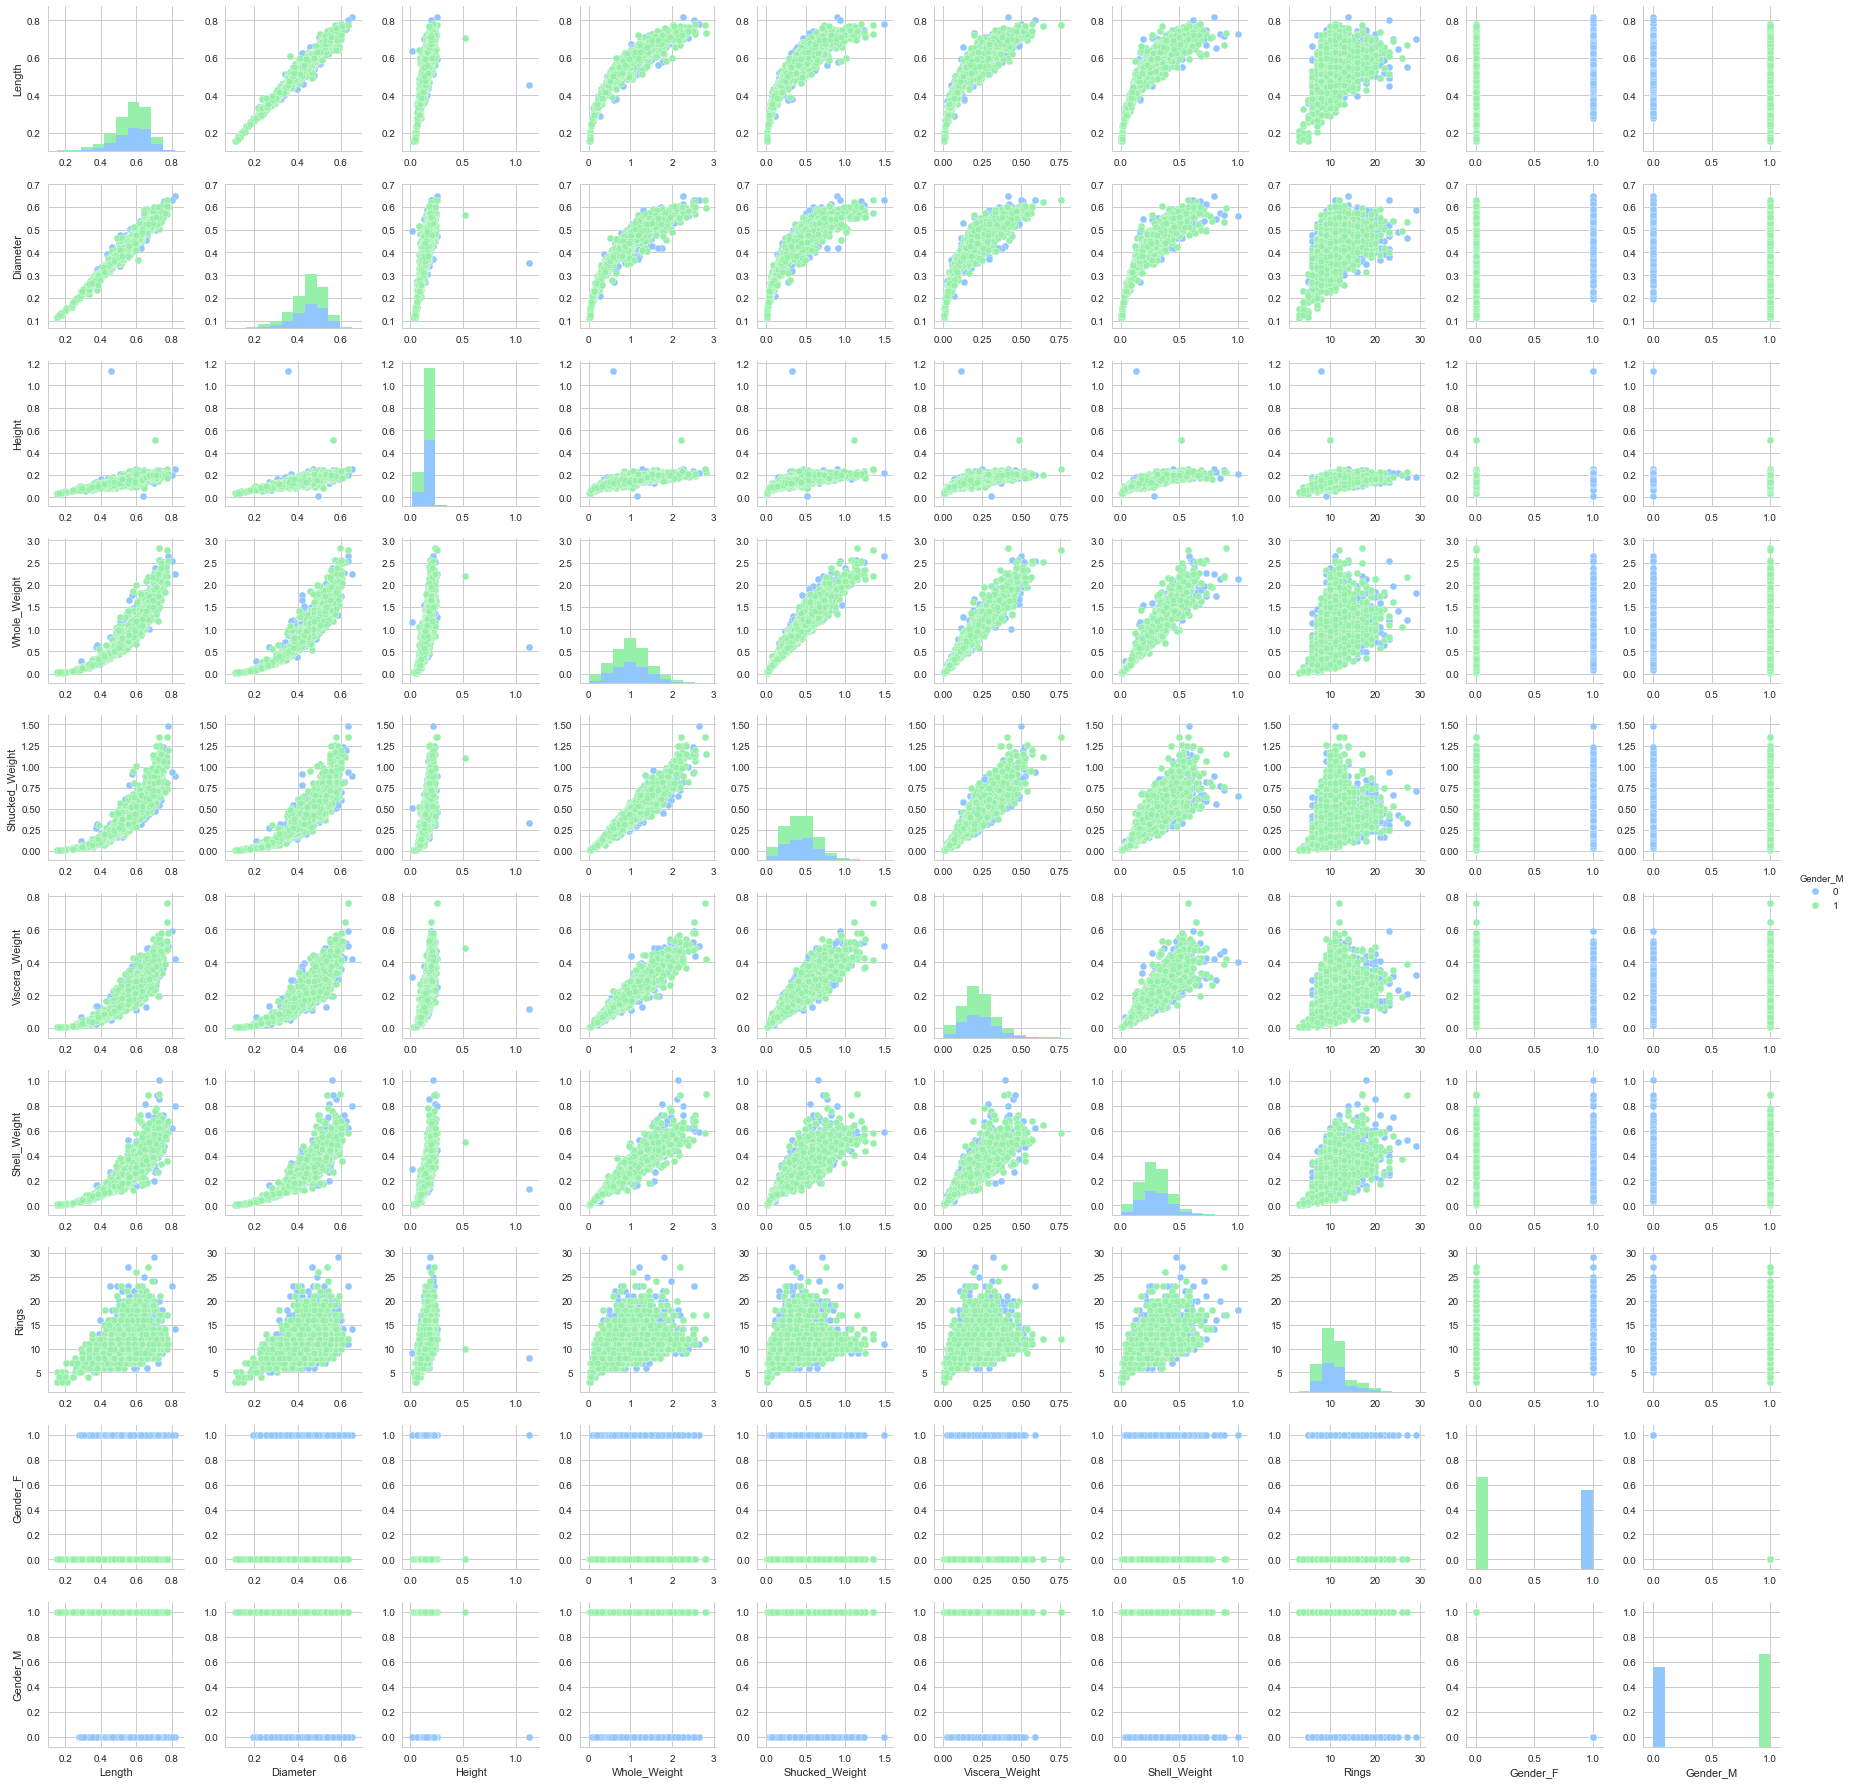

In [42]:
sns.pairplot(data=df_final, hue="Gender_M")

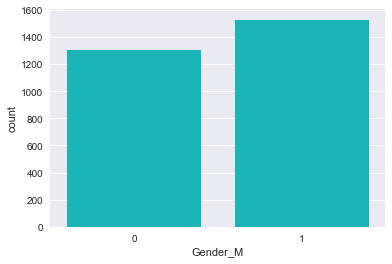

In [22]:
sns.countplot('Gender_M', data=df_final, color="darkturquoise")
plt.show()

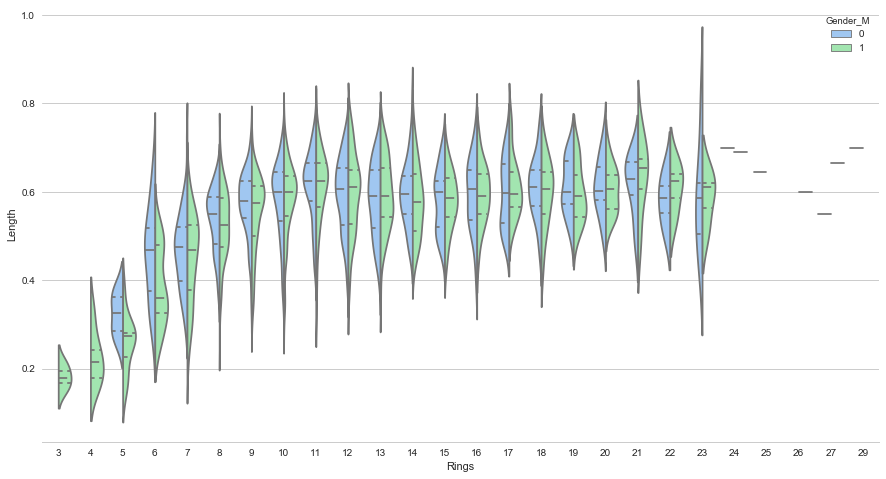

In [30]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
plt.figure(figsize=(15,8))
sns.violinplot(x="Rings", y="Length", hue="Gender_M", data=df_final, split=True,
               inner="quart")
sns.despine(left=True)

### 3.2 Assess Correlations of Continuous Variables

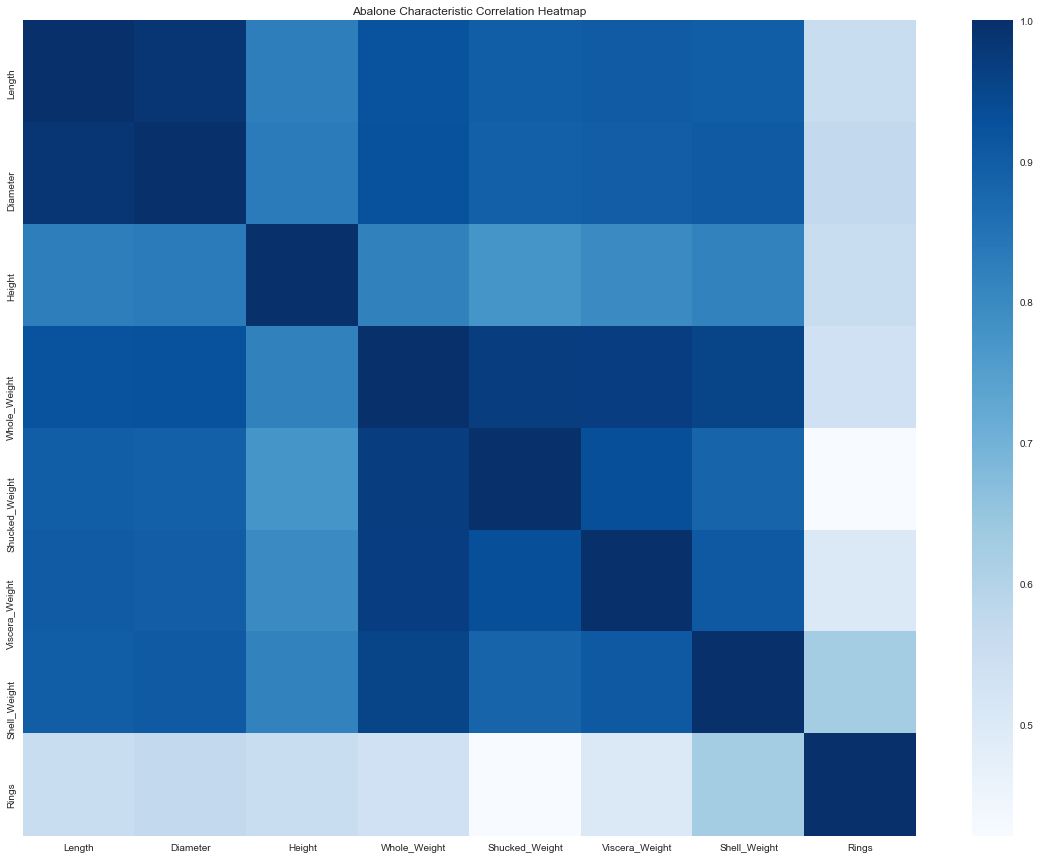

In [19]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Abalone Characteristic Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")
plt.show()

## 4. Logistic Regression

### 80-20 Split for Cross Validation

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.2)

In [9]:
cols=["Length", "Diameter", "Height","Whole_Weight","Shucked_Weight","Viscera_Weight","Shell_Weight","Rings"] 
X=train[cols]
y=train['Gender_M']

In [10]:
import statsmodels.api as sm
from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [11]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 6.611248
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Gender_M   No. Observations:                 2268
Model:                          Logit   Df Residuals:                     2260
Method:                           MLE   Df Model:                            7
Date:                Fri, 02 Feb 2018   Pseudo R-squ.:                  -18.83
Time:                        20:00:44   Log-Likelihood:                -14994.
converged:                       True   LL-Null:                       -756.08
                                        LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Length             3.0721      2.090      1.470      0.142      -1.024       7.168
Diameter         

### Remove insignificant variables iteratively

In [12]:
cols2=["Length", "Diameter","Shucked_Weight","Viscera_Weight"] 
X2=train[cols2]
y2=train['Gender_M']

In [13]:
logit_model=sm.Logit(y2,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 5.738537
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Gender_M   No. Observations:                 2268
Model:                          Logit   Df Residuals:                     2264
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Feb 2018   Pseudo R-squ.:                  -16.21
Time:                        20:00:44   Log-Likelihood:                -13015.
converged:                       True   LL-Null:                       -756.08
                                        LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Length             3.8701      2.034      1.903      0.057      -0.116       7.856
Diameter         

### Assessing Model Performance (train sample)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X2, y2)
logreg.score(X2, y2)

0.55952380952380953

### Assessing Model Performance on Hold-Out Sample

In [15]:
from sklearn import metrics
logreg.fit(X2, y2)

X2_test = test[cols2]
y2_test = test['Gender_M']

Y2test_pred = logreg.predict(X2_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X2_test, y2_test)))
logreg.score(X2_test, y2_test)

0.56261022927689597

## 5. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

cols=["Length", "Diameter", "Height","Whole_Weight","Shucked_Weight","Viscera_Weight","Shell_Weight","Rings"] 
X=train[cols]
y=train['Gender_M']

random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(X, y)
random_forest.score(X, y)

0.94708994708994709

In [17]:
X_test=test[cols]
y_test=test['Gender_M']

random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(X, y)
random_forest.predict(X_test)
random_forest.score(X_test, y_test)

0.52910052910052907

#### Well that's terrible out-of-sample performance. Let's try a decision tree.

## 6. Decision Tree

In [34]:
!pip install graphviz

  Using cached graphviz-0.8.2-py2.py3-none-any.whl


In [35]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [37]:
tree1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH